In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding 
from tensorflow.keras.models import Model
import pickle

In [ ]:
cleandata = pd.read_csv('/content/drive/My Drive/ColabNotebooks/FYP Try/new_clean_content.csv')

In [ ]:
df_train, df_test, Ytrain, Ytest = train_test_split(cleandata['clean content'], cleandata['label'], test_size=0.33)

In [ ]:
T = 29286

In [ ]:
tokenizer = None
with open('/content/drive/My Drive/ColabNotebooks/FYP Try/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
len(tokenizer.word_index)

155673

In [ ]:
V = len(tokenizer.word_index)+1

In [ ]:
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
data_train = pad_sequences(sequences_train)

In [ ]:
T = data_train.shape[1]
T

29286

In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)

In [ ]:
embedding_matrix = np.load('/content/drive/My Drive/ColabNotebooks/FYP Try/embmat.npy')

In [ ]:
embedding_matrix.shape

(155674, 300)

In [ ]:
M = 10


i = Input(shape=(T,))
x = Embedding(V, 300, weights=[embedding_matrix], trainable=False)(i)

# Now we have N x T x D

x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest),
  batch_size=50
)

Epoch 1/10
374/374 [==============================] - 584s 2s/step - loss: 0.5617 - accuracy: 0.7108 - val_loss: 0.4393 - val_accuracy: 0.8180
Epoch 2/10
374/374 [==============================] - 578s 2s/step - loss: 0.3922 - accuracy: 0.8391 - val_loss: 0.3857 - val_accuracy: 0.8247
Epoch 3/10
374/374 [==============================] - 577s 2s/step - loss: 0.3645 - accuracy: 0.8539 - val_loss: 0.3709 - val_accuracy: 0.8453
Epoch 4/10
374/374 [==============================] - 569s 2s/step - loss: 0.3792 - accuracy: 0.8456 - val_loss: 0.3555 - val_accuracy: 0.8600
Epoch 5/10
374/374 [==============================] - 572s 2s/step - loss: 0.3240 - accuracy: 0.8754 - val_loss: 0.3122 - val_accuracy: 0.8785
Epoch 6/10
374/374 [==============================] - 578s 2s/step - loss: 0.2853 - accuracy: 0.8882 - val_loss: 0.2764 - val_accuracy: 0.8939
Epoch 7/10
374/374 [==============================] - 577s 2s/step - loss: 0.2495 - accuracy: 0.9070 - val_loss: 0.2351 - val_accuracy: 0.9147

In [ ]:
r2 = model.fit(
  data_train,
  Ytrain,
  epochs=5,
  validation_data=(data_test, Ytest),
  batch_size=50
)

Epoch 1/5
374/374 [==============================] - 573s 2s/step - loss: 0.1744 - accuracy: 0.9380 - val_loss: 0.1943 - val_accuracy: 0.9310
Epoch 2/5
374/374 [==============================] - 574s 2s/step - loss: 0.1772 - accuracy: 0.9350 - val_loss: 0.2285 - val_accuracy: 0.9134
Epoch 3/5
374/374 [==============================] - 574s 2s/step - loss: 0.1640 - accuracy: 0.9425 - val_loss: 0.1714 - val_accuracy: 0.9409
Epoch 4/5
374/374 [==============================] - 572s 2s/step - loss: 0.1531 - accuracy: 0.9443 - val_loss: 0.1724 - val_accuracy: 0.9383
Epoch 5/5
374/374 [==============================] - 575s 2s/step - loss: 0.1353 - accuracy: 0.9529 - val_loss: 0.1652 - val_accuracy: 0.9418


In [ ]:
model.save('/content/drive/My Drive/ColabNotebooks/FYP Try/model15epo.h5')

In [ ]:
model.save('model15epo.h5')

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29286)]           0         
_________________________________________________________________
embedding (Embedding)        (None, 29286, 300)        46702200  
_________________________________________________________________
lstm (LSTM)                  (None, 29286, 10)         12440     
_________________________________________________________________
global_max_pooling1d (Global (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 46,714,651
Trainable params: 12,451
Non-trainable params: 46,702,200
_________________________________________________________________


In [ ]:
np.save('/content/drive/My Drive/ColabNotebooks/FYP Try/data_train.npy', data_train)
np.save('/content/drive/My Drive/ColabNotebooks/FYP Try/Ytrain.npy', Ytrain)
np.save('/content/drive/My Drive/ColabNotebooks/FYP Try/data_test.npy', data_test) 
np.save('/content/drive/My Drive/ColabNotebooks/FYP Try/Ytest.npy', Ytest)

In [ ]:
model.predict(data_test)

array([[0.02184489],
       [0.12484632],
       [0.09486606],
       ...,
       [0.8651271 ],
       [0.98749083],
       [0.99394965]], dtype=float32)

In [ ]:
r3 = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest),
  batch_size=50
)

Epoch 1/10
374/374 [==============================] - 585s 2s/step - loss: 0.1301 - accuracy: 0.9551 - val_loss: 0.1614 - val_accuracy: 0.9427
Epoch 2/10
374/374 [==============================] - 580s 2s/step - loss: 0.1238 - accuracy: 0.9582 - val_loss: 0.1604 - val_accuracy: 0.9438
Epoch 3/10
374/374 [==============================] - 578s 2s/step - loss: 0.1158 - accuracy: 0.9607 - val_loss: 0.1667 - val_accuracy: 0.9408
Epoch 4/10
374/374 [==============================] - 577s 2s/step - loss: 0.1117 - accuracy: 0.9631 - val_loss: 0.1576 - val_accuracy: 0.9420
Epoch 5/10
374/374 [==============================] - 575s 2s/step - loss: 0.1112 - accuracy: 0.9630 - val_loss: 0.1688 - val_accuracy: 0.9380
Epoch 6/10
374/374 [==============================] - 571s 2s/step - loss: 0.0995 - accuracy: 0.9681 - val_loss: 0.1487 - val_accuracy: 0.9475
Epoch 7/10
374/374 [==============================] - 571s 2s/step - loss: 0.0944 - accuracy: 0.9684 - val_loss: 0.1545 - val_accuracy: 0.9448

In [ ]:
model.save('/content/drive/My Drive/ColabNotebooks/FYP Try/model25epo.h5')

In [ ]:
model.save('model25epo.h5')

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29286)]           0         
_________________________________________________________________
embedding (Embedding)        (None, 29286, 300)        46702200  
_________________________________________________________________
lstm (LSTM)                  (None, 29286, 10)         12440     
_________________________________________________________________
global_max_pooling1d (Global (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 46,714,651
Trainable params: 12,451
Non-trainable params: 46,702,200
_________________________________________________________________


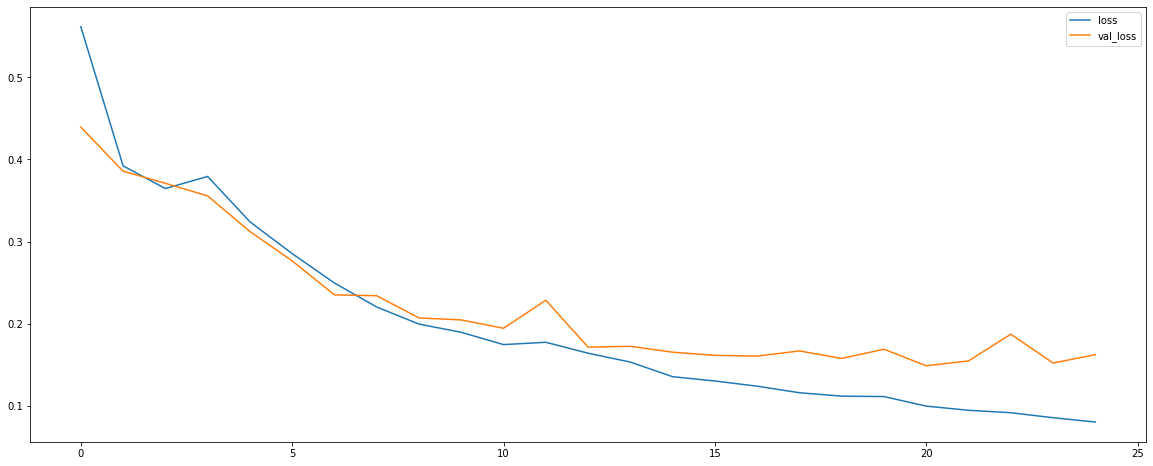

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(r.history['loss']+r2.history['loss']+r3.history['loss'], label='loss')
plt.plot(r.history['val_loss']+r2.history['val_loss']+r3.history['val_loss'], label='val_loss')
plt.legend()

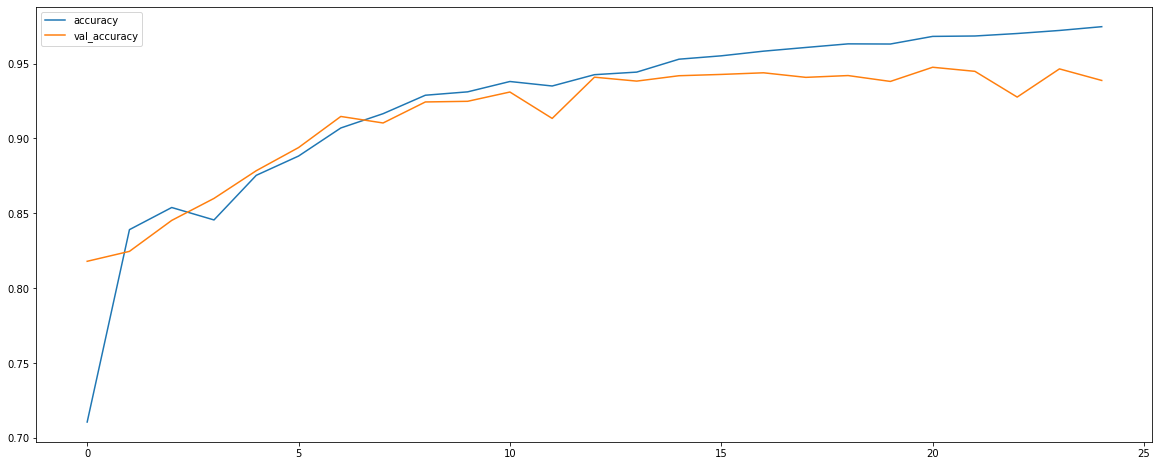

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(r.history['accuracy']+r2.history['accuracy']+r3.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy']+r2.history['val_accuracy']+r3.history['val_accuracy'], label='val_accuracy')
plt.legend()